In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# tensorflow 2.0
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 사용 함수
from tensorflow.keras.layers import Dense       # class
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.0.0


In [2]:
df = pd.read_csv('./pima.csv',
            names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
print(type(df))
print(df.head(5))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [3]:
data = np.loadtxt('./pima.csv', delimiter=',')
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(768, 9)


In [4]:
# Data Split
x = data[0:568, 0:8]
y = data[0:568, 8:]

x_val = data[568:668, 0:8]
y_val = data[568:668, 8:]

x_test = data[668:, 0:8]
y_test = data[668:, 8:]

print('shape of x, y')
print(x.shape)
print(y.shape)

print('shape of x_val, y_val')
print(x_val.shape)
print(y_val.shape)

print('shape of x_test, y_test')
print(x_test.shape)
print(y_test.shape)

shape of x, y
(568, 8)
(568, 1)
shape of x_val, y_val
(100, 8)
(100, 1)
shape of x_test, y_test
(100, 8)
(100, 1)


In [5]:
# Create Model
model = Sequential()

# Multi-Layer/network Perceptron
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu')) 
model.add(Dense(32, activation='relu')) 
model.add(Dense(16, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) # binary result

# Setting Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Setting stop point
# : stop when min error ocurred 10 times
stop_point = EarlyStopping(monitor='loss', patience=10)

In [8]:
model.summary()
hist = model.fit(x, y, validation_data=(x_val, y_val), shuffle=True, epochs=1000, batch_size=8, callbacks=[stop_point])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________
Train on 568 samples, validate on 100 samples
Epoch 1/1000
568/568 [==============================] - 0s 219us/sample 

568/568 [==============================] - 0s 201us/sample - loss: 0.4919 - accuracy: 0.7606 - val_loss: 0.5468 - val_accuracy: 0.7600
Epoch 49/1000
568/568 [==============================] - 0s 201us/sample - loss: 0.4883 - accuracy: 0.7641 - val_loss: 0.6061 - val_accuracy: 0.7300
Epoch 50/1000
568/568 [==============================] - 0s 203us/sample - loss: 0.4939 - accuracy: 0.7588 - val_loss: 0.5553 - val_accuracy: 0.7300
Epoch 51/1000
568/568 [==============================] - 0s 201us/sample - loss: 0.5040 - accuracy: 0.7535 - val_loss: 0.6617 - val_accuracy: 0.7100
Epoch 52/1000
568/568 [==============================] - 0s 203us/sample - loss: 0.4867 - accuracy: 0.7535 - val_loss: 0.7148 - val_accuracy: 0.6000
Epoch 53/1000
568/568 [==============================] - 0s 180us/sample - loss: 0.5017 - accuracy: 0.7606 - val_loss: 0.5950 - val_accuracy: 0.7200
Epoch 54/1000
568/568 [==============================] - 0s 230us/sample - loss: 0.4746 - accuracy: 0.7729 - val_loss: 0

568/568 [==============================] - 0s 222us/sample - loss: 0.4254 - accuracy: 0.7975 - val_loss: 0.5851 - val_accuracy: 0.7700
Epoch 104/1000
568/568 [==============================] - 0s 204us/sample - loss: 0.4048 - accuracy: 0.8116 - val_loss: 0.6134 - val_accuracy: 0.7100
Epoch 105/1000
568/568 [==============================] - 0s 206us/sample - loss: 0.4211 - accuracy: 0.8011 - val_loss: 0.7666 - val_accuracy: 0.7100
Epoch 106/1000
568/568 [==============================] - 0s 203us/sample - loss: 0.4288 - accuracy: 0.7870 - val_loss: 0.5679 - val_accuracy: 0.7400
Epoch 107/1000
568/568 [==============================] - 0s 204us/sample - loss: 0.3879 - accuracy: 0.8239 - val_loss: 0.6293 - val_accuracy: 0.7100
Epoch 108/1000
568/568 [==============================] - 0s 215us/sample - loss: 0.4190 - accuracy: 0.7975 - val_loss: 0.6937 - val_accuracy: 0.7200
Epoch 109/1000
568/568 [==============================] - 0s 215us/sample - loss: 0.3985 - accuracy: 0.8116 - val_l

Epoch 158/1000
568/568 [==============================] - 0s 213us/sample - loss: 0.3424 - accuracy: 0.8363 - val_loss: 0.9486 - val_accuracy: 0.7100
Epoch 159/1000
568/568 [==============================] - 0s 208us/sample - loss: 0.3098 - accuracy: 0.8609 - val_loss: 1.0679 - val_accuracy: 0.7100
Epoch 160/1000
568/568 [==============================] - 0s 210us/sample - loss: 0.3023 - accuracy: 0.8574 - val_loss: 1.0280 - val_accuracy: 0.6400
Epoch 161/1000
568/568 [==============================] - 0s 213us/sample - loss: 0.3538 - accuracy: 0.8451 - val_loss: 1.0194 - val_accuracy: 0.6900
Epoch 162/1000
568/568 [==============================] - 0s 224us/sample - loss: 0.3373 - accuracy: 0.8504 - val_loss: 0.7896 - val_accuracy: 0.7500
Epoch 163/1000
568/568 [==============================] - 0s 206us/sample - loss: 0.3230 - accuracy: 0.8451 - val_loss: 0.8911 - val_accuracy: 0.7600
Epoch 164/1000
568/568 [==============================] - 0s 207us/sample - loss: 0.3162 - accuracy:

568/568 [==============================] - 0s 206us/sample - loss: 0.2439 - accuracy: 0.8873 - val_loss: 1.7396 - val_accuracy: 0.7100
Epoch 213/1000
568/568 [==============================] - 0s 206us/sample - loss: 0.2256 - accuracy: 0.8979 - val_loss: 1.6993 - val_accuracy: 0.6400
Epoch 214/1000
568/568 [==============================] - 0s 206us/sample - loss: 0.2385 - accuracy: 0.8803 - val_loss: 1.8754 - val_accuracy: 0.6800
Epoch 215/1000
568/568 [==============================] - 0s 205us/sample - loss: 0.2317 - accuracy: 0.9014 - val_loss: 1.6707 - val_accuracy: 0.6800
Epoch 216/1000
568/568 [==============================] - 0s 217us/sample - loss: 0.2520 - accuracy: 0.8856 - val_loss: 1.8014 - val_accuracy: 0.6500
Epoch 217/1000
568/568 [==============================] - 0s 215us/sample - loss: 0.2486 - accuracy: 0.8891 - val_loss: 1.6578 - val_accuracy: 0.7000
Epoch 218/1000
568/568 [==============================] - 0s 218us/sample - loss: 0.2639 - accuracy: 0.8873 - val_l

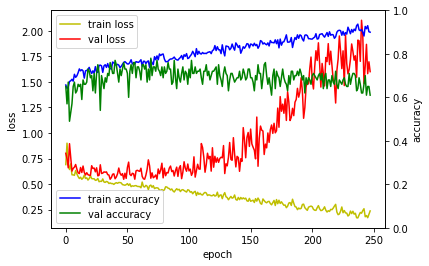

In [9]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

# left y-axis setting
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
# loss_ax.set_ylim([0.0, 1.0])

# right y-axis setting
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

# set labels
loss_ax.set_xlabel('epoch')  
loss_ax.set_ylabel('loss')   
acc_ax.set_ylabel('accuracy') 

loss_ax.legend(loc='upper left') 
acc_ax.legend(loc='lower left')  

plt.show()